# Estabilidad y error del método implícito

In [2]:
using LaTeXStrings;

Teniendo en cuenta que el método implícito, para el problema particular, es de la forma
\begin{align}
     \begin{array}{l}
          \{[ 2-\alpha _{1}( x_{i})]\hat{I} -\alpha \Delta t\hat{A}\} u_{1}( x_{i} ,t+\Delta t) -\beta u_{2}( x_{i} ,t+\Delta t) =\dotsc \\
          \dotsc \{[ 2+\alpha _{1}( x_{i})]\hat{I} +\alpha \Delta t\hat{A}\} u_{1}( x_{i} ,t) +\beta u_{2}( x_{i} ,t)
     \end{array}
\end{align}

y como los autovalores de $\displaystyle \hat{A}$ (operador que aproxima al Laplaceano $\displaystyle \Delta $) son de la forma $\displaystyle \lambda =\frac{-c}{(\Delta x)^2},\ c >0$ entonces para cada autofunción del operador $\displaystyle \hat{A}$ tendremos de la ecuación implícita que,

\begin{align}
     [ 2-\alpha _{1}( x_{i}) -\alpha \Delta t\lambda _{k}] u_{1}^{k}( x_{i} ,t+\Delta t) =[ 2+\alpha _{1}( x_{i}) +\alpha \Delta t\lambda _{k}] u_{1}^{k}( x_{i} ,t) +\beta u_{2}^{k}( x_{i} ,t)
\end{align}

y el factor de amplificación para $\displaystyle u_{1}$ será (reemplazando valores para $\displaystyle \alpha ,\alpha _{i}( x) ,\beta $),

In [ ]:
using Plots;
using LinearAlgebra;

Declaramos parámetros constantes

In [170]:
const m=1.0;const ω=1.0;const ħ=1.0;const γ=0.1;const x₁=0.0;const x₂=2.0;

### 2. Definimos algunas funciones útiles

In [171]:
λ(Δx)=-1.0/(Δx*Δx);                                 # como escalean los autovalores
s₁(Δx,Δt)=m*ω*ω*Δx*Δx*(1.0*ħ)-ħ*Δt*λ(Δx)*(1.0/m);   # factor imaginario
s₂=4.0;                                             # factor real

Construimos una función para calcular el factor de amplificación del método numérico

In [ ]:
function f_AmpAprox(Δx_vect,Δt_vect;type="NOabs")
    dim_rows=length(Δx_vect);

    if type=="NOabs"
        MatrixResult=Matrix{ComplexF64}(undef,dim_rows,3);
    elseif type=="abs"
        MatrixResult=Matrix{Float64}(undef,dim_rows,3);
    end

    MatrixResult[:,1]=transpose(Δx_vect[:]);
    MatrixResult[:,2]=transpose(Δt_vect[:]);

    if type=="NOabs"
        for i in 1:dim_rows
            for j in 1:dim_rows
                MatrixResult[i,3]=(s₂+im*s₁(Δx[i],Δt[j]))*(1.0/(s₂-im*s₁(Δx[i],Δt[j])));
            end
        end
    elseif type=="abs"
        for i in 1:dim_rows
            for j in 1:dim_rows
                MatrixResult[i,3]=abs((s₂+im*s₁(Δx[i],Δt[j]))*(1.0/(s₂-im*s₁(Δx[i],Δt[j]))));
            end
        end
    end

    return MatrixResult;
end

Construimos una función para calcular el factor de amplificación exácto

In [ ]:
function f_AmpExact(Δx_vect,Δt_vect;type="NOabs")
    dim_rows=length(Δx_vect);

    if type=="NOabs"
        MatrixResult=Matrix{ComplexF64}(undef,dim_rows,3);
    elseif type=="abs"
        MatrixResult=Matrix{Float64}(undef,dim_rows,3);
    end

    MatrixResult[:,1]=transpose(Δx_vect[:]);
    MatrixResult[:,2]=transpose(Δt_vect[:]);

    if type=="NOabs"
        for i in 1:dim_rows
            for j in 1:dim_rows
                MatrixResult[i,3]=exp(-im*λ(Δx[i])*Δt[j]*(1.0/ħ));
            end
        end
    elseif type=="abs"
        for i in 1:dim_rows
            for j in 1:dim_rows
                MatrixResult[i,3]=abs(exp(-im*λ(Δx[i])*Δt[j]*(1.0/ħ)));
            end
        end
    end

    return MatrixResult;
end

Construimos una función para calcular el error del método implícito para problemas particulares de Mecánica Cuántica

In [250]:
function f_error(Δx_vect,Δt_vect;type="NOabs")
    dim_rows=length(Δx_vect);

    if type=="NOabs"
        MatrixResult=Matrix{ComplexF64}(undef,dim_rows,3);
    elseif type=="abs"
        MatrixResult=Matrix{Float64}(undef,dim_rows,3);
    end

    MatrixResult[:,1]=transpose(Δx_vect[:]);
    MatrixResult[:,2]=transpose(Δt_vect[:]);

    if type=="NOabs"
        for i in 1:dim_rows
            for j in 1:dim_rows
                MatrixResult[i,3]=exp(-im*λ(Δx[i])*Δt[j]*(1.0/ħ))-(s₂+im*s₁(Δx[i],Δt[j]))*(1.0/(s₂-im*s₁(Δx[i],Δt[j])));
            end
        end
    elseif type=="abs"
        for i in 1:dim_rows
            for j in 1:dim_rows
                MatrixResult[i,3]=abs(exp(-im*λ(Δx[i])*Δt[j]*(1.0/ħ))-(s₂+im*s₁(Δx[i],Δt[j]))*(1.0/(s₂-im*s₁(Δx[i],Δt[j]))));
            end
        end
    end
    
    return MatrixResult;
end

f_error (generic function with 2 methods)

### 3. Graficamos resultados

Graficamos el error del método implícito para distintos valores de $\Delta x$ (discretizacion espacial) y $\Delta t$ (discretización temporal)

In [251]:
Δx=[0.01*i for i in 1:1000];
Δt₁=0.1.*Δx;
Δt₂=1.0.*Δx;
Δt₃=10.0.*Δx;
f_ΔxΔt₁=f_error(Δx,Δt₁;type="abs");
f_ΔxΔt₂=f_error(Δx,Δt₂;type="abs");
f_ΔxΔt₃=f_error(Δx,Δt₃;type="abs");

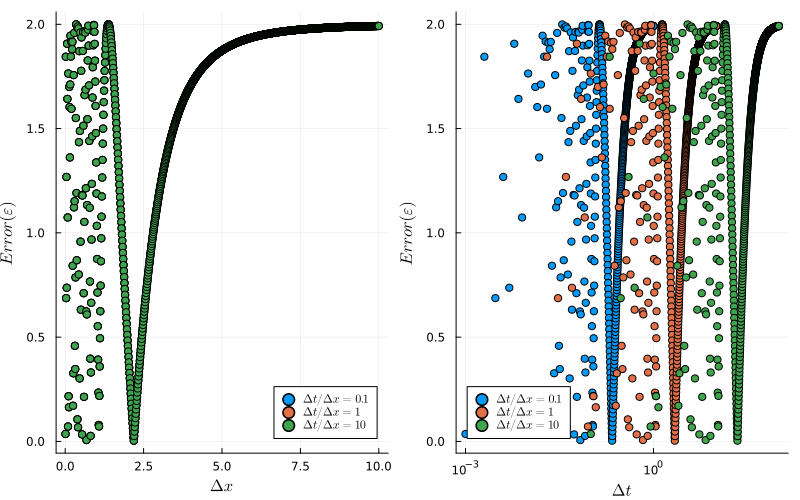

In [252]:
plot1=scatter(f_ΔxΔt₁[:,1],f_ΔxΔt₁[:,3],
    xlabel="\$\\Delta x\$",ylabel="\$Error(\\epsilon)\$",label="\$\\Delta t/\\Delta x=0.1\$",legend=:bottomright);
plot1=scatter!(f_ΔxΔt₂[:,1],f_ΔxΔt₂[:,3],
    xlabel="\$\\Delta x\$",ylabel="\$Error(\\epsilon)\$",label="\$\\Delta t/\\Delta x=1\$",legend=:bottomright);
plot1=scatter!(f_ΔxΔt₃[:,1],f_ΔxΔt₃[:,3],
    xlabel="\$\\Delta x\$",ylabel="\$Error(\\epsilon)\$",label="\$\\Delta t/\\Delta x=10\$",legend=:bottomright);
plot2=scatter(f_ΔxΔt₁[:,2],f_ΔxΔt₁[:,3],
    xlabel="\$\\Delta t\$",ylabel="\$Error(\\epsilon)\$",label="\$\\Delta t/\\Delta x=0.1\$",legend=:bottomleft,
    xscale=:log10,lw=2);
plot2=scatter!(f_ΔxΔt₂[:,2],f_ΔxΔt₂[:,3],
    xlabel="\$\\Delta t\$",ylabel="\$Error(\\epsilon)\$",label="\$\\Delta t/\\Delta x=1\$",legend=:bottomleft,
    xscale=:log10,lw=2);
plot2=scatter!(f_ΔxΔt₃[:,2],f_ΔxΔt₃[:,3],
    xlabel="\$\\Delta t\$",ylabel="\$Error(\\epsilon)\$",label="\$\\Delta t/\\Delta x=10\$",legend=:bottomleft,
    xscale=:log10,lw=2);
plot3=plot(plot1,plot2,layout=(1,2),size=(800,500))
display(plot3)

In [310]:
Δx=[0.01*i for i in 1:1000];
Δt₄=1.0.*Δx;

In [311]:
faprox=f_AmpAprox(Δx,Δt₄);
fexact=f_AmpExact(Δx,Δt₄);
ferror=f_error(Δx,Δt₄);

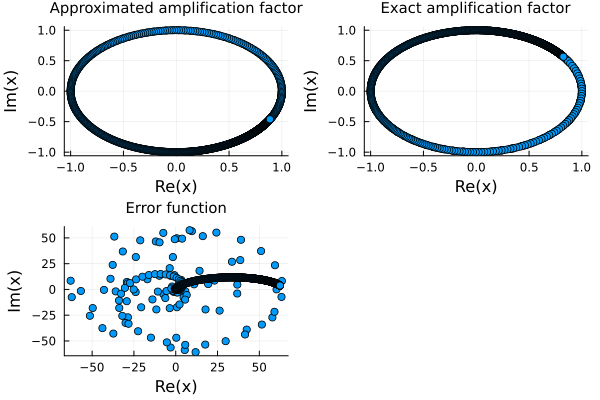

In [312]:
plot1=scatter(faprox[:,3].^6,label="",title="Approximated amplification factor",titlefontsize=10);
plot2=scatter(fexact[:,3].^6,label="",title="Exact amplification factor",titlefontsize=10);
plot3=scatter(ferror[:,3].^6,label="",title="Error function",titlefontsize=10);

plot4=plot(plot1,plot2,plot3,layout=3)
display(plot4)